In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Reading File and Pre-processing

# 
The team wants to know which employees are going to leave the job, therefore a classification model will be designed, the targeted value is the Atretion. three models will be trained and evaluated in this use case:

Logistic Regression
Random forest
Feedforward neural network

In [55]:
df = pd.read_csv(r"C:\Users\HP\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.describe()
pd.options.display.max_columns = 500

df
#df.info()
#df.head(5)
#df.Gender.value_counts() # shows it has how many values, if more than one than it apperas here.
#df.isna().sum()
#df.duplicated().sum()

# Now since all the values sum is 0 it means that the data is clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Converts each category into a new column with 0s and 1s. (one-hot encoding) binary of there are only yes or no , male or female 

In [56]:
# get the features which have only two values in columns and change them into binary
#Attrition Gneder Over18 OverTime

df['Attrition']= df['Attrition'].apply(lambda x :1 if x== "Yes" else 0)
df['Gender']= df['Gender'].apply(lambda x :1 if x== "Yes" else 0)
df['Over18']= df['Over18'].apply(lambda x :1 if x== "Yes" else 0)
df['OverTime']= df['OverTime'].apply(lambda x :1 if x== "Yes" else 0)
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [57]:
# One-hot encoding of the following features:
# BusinessTravel, EducationField, Department, JobRole, MaritalStatus

'''df = df.join(pd.get_dummies(df['BusinessTravel'], prefix= 'Travelfor')).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='Education')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='Role')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='Marital')).drop('MaritalStatus', axis=1)
df'''
# List of desired columns and their prefixes
cols_to_encode = {
    'BusinessTravel': 'Travelfor',
    'EducationField': 'Education',
    'JobRole': 'Role',
    'Department': 'Department',
    'MaritalStatus': 'Marital'
}

# Filter only those that actually exist in df
existing_cols = [col for col in cols_to_encode if col in df.columns]
prefixes = [cols_to_encode[col] for col in existing_cols]

# Apply get_dummies safely
df = pd.get_dummies(df, columns=existing_cols, prefix=prefixes)




Applies a function to every value in the entire DataFrame.

If a value is True, it becomes 1.

If it's False, it becomes 0.

If it's neither (like a string, number, or NaN), it remains unchanged.

This is helpful when you have boolean columns like Attrition or OverTime that are True/False and you want to convert them into 1/0 for machine learning models.

In [58]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df = df.drop('EmployeeNumber', axis = 1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travelfor_Non-Travel,Travelfor_Travel_Frequently,Travelfor_Travel_Rarely,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,Marital_Divorced,Marital_Married,Marital_Single
0,41,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,49,0,279,8,1,1,3,0,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,0,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,0,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,3,0,41,4,2,4,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1466,39,0,613,6,1,1,4,0,42,2,3,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1467,27,0,155,4,3,1,2,0,87,4,2,2,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1468,49,0,1023,2,3,1,4,0,63,2,2,2,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


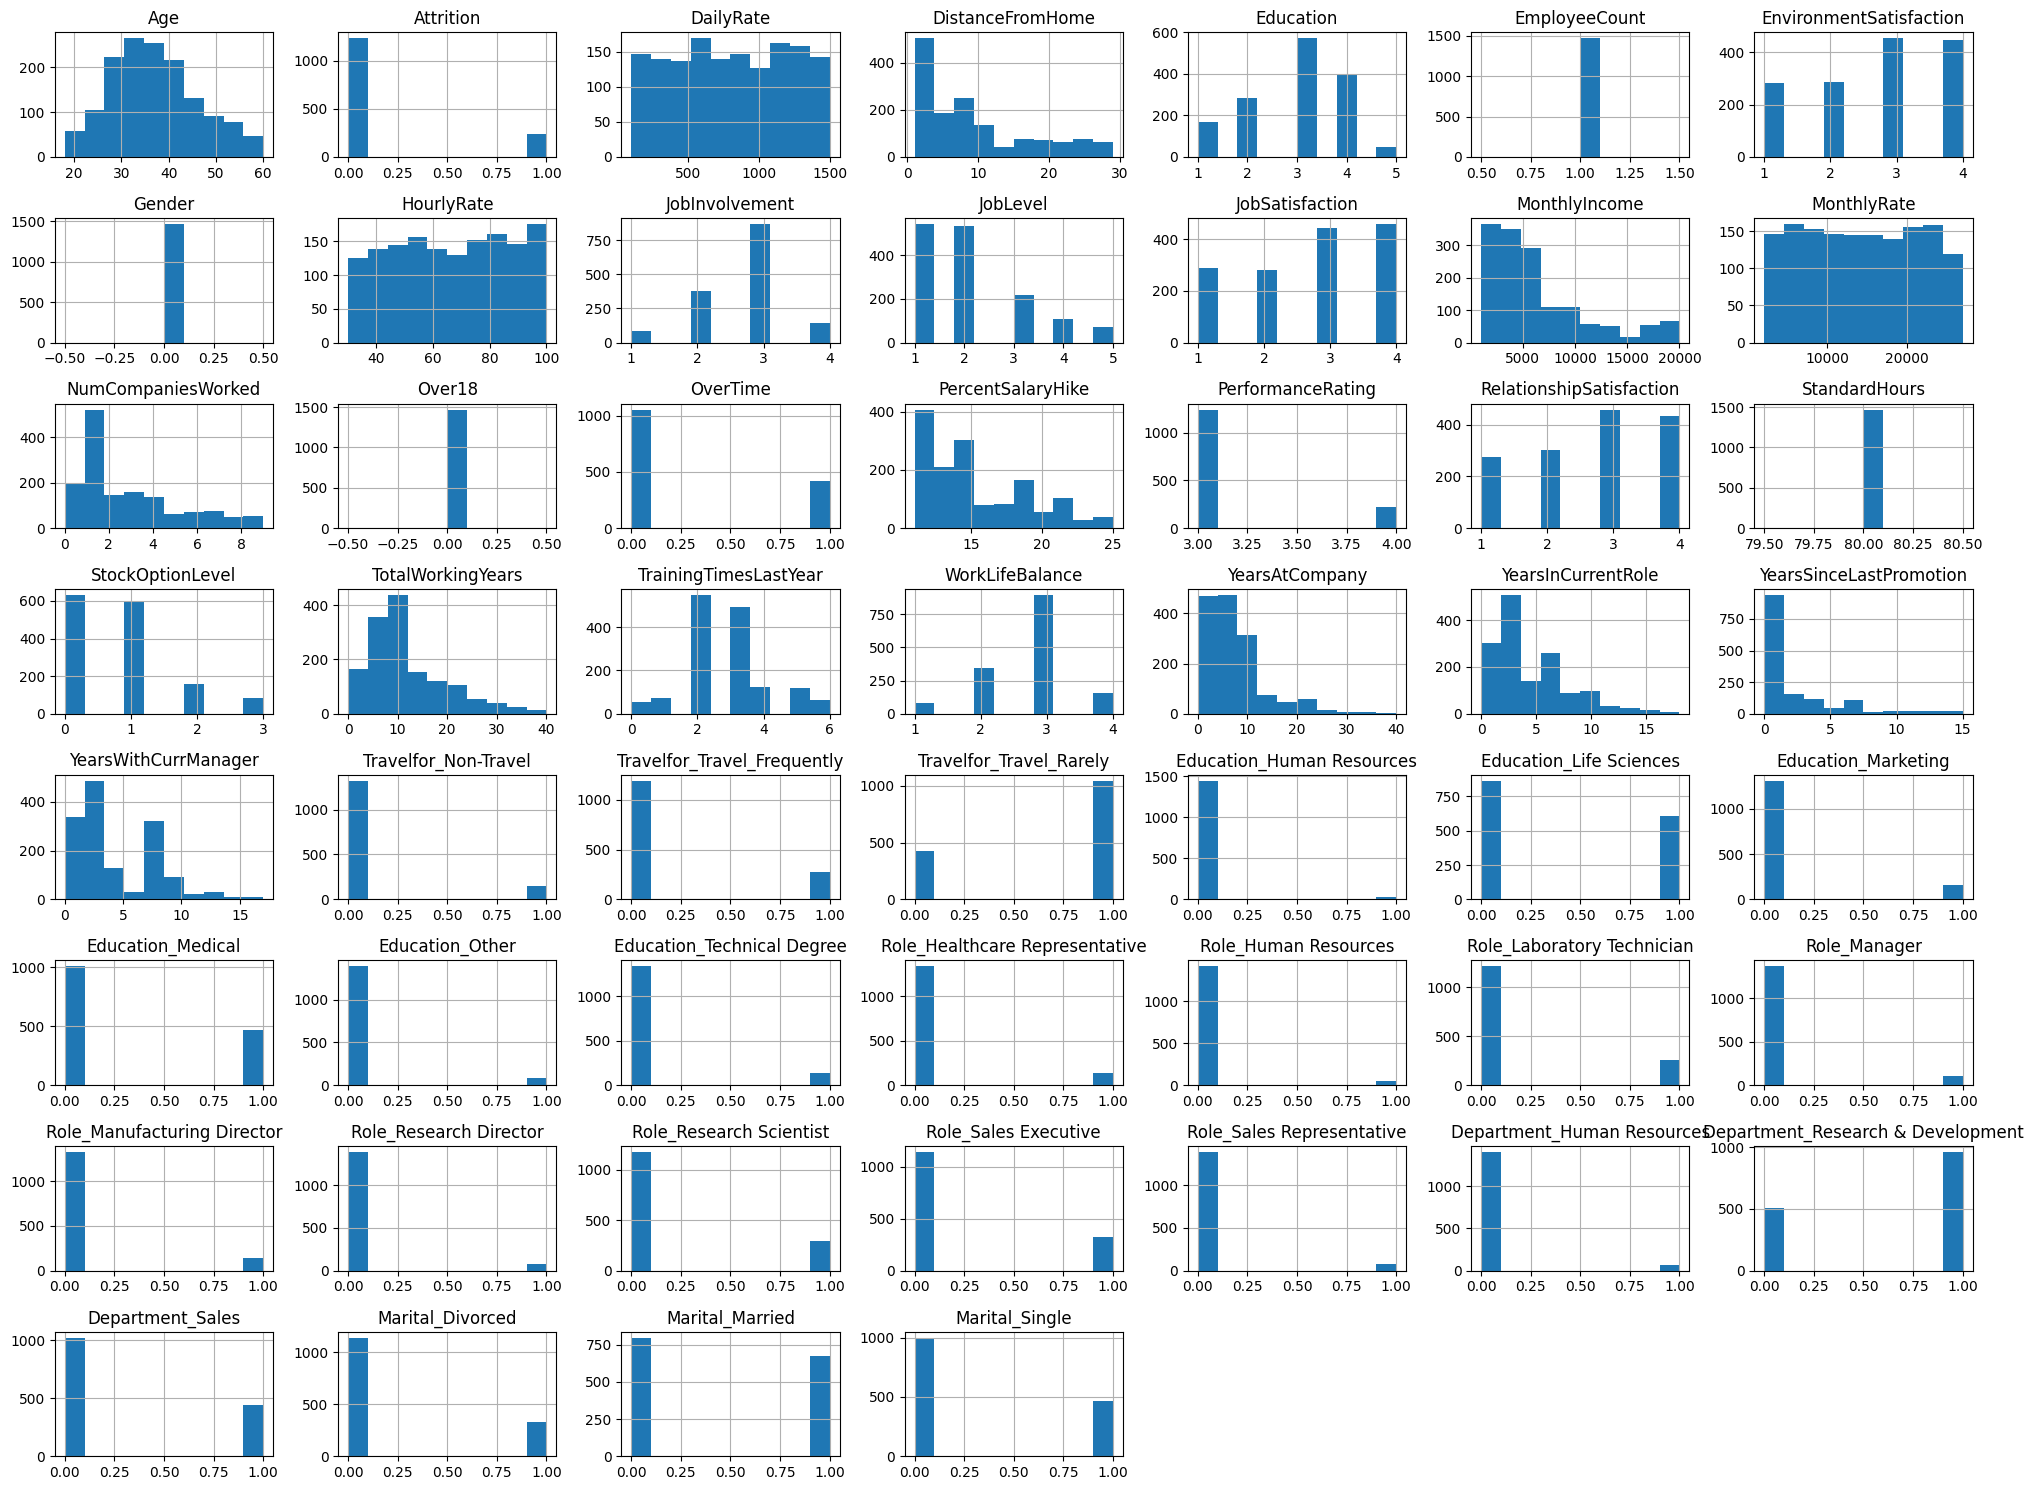

In [61]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [64]:
#we can drop certain colums which are not important cz there values are all 0 sometimes
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travelfor_Non-Travel,Travelfor_Travel_Frequently,Travelfor_Travel_Rarely,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales,Marital_Divorced,Marital_Married,Marital_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,0,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1466,39,0,613,6,1,4,0,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1467,27,0,155,4,3,2,0,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1468,49,0,1023,2,3,4,0,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


## Model Training (Final)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop('Attrition', axis =1 ), df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)
model = RandomForestClassifier(n_jobs= -1)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [67]:
model.score(X_test, y_test)

0.8503401360544217

## Sorting Features

zip(model.feature_names_in_, model.feature_importances_)

This pairs each feature name with its corresponding importance value from the model.

Example output (before sorting):
[('Age', 0.02), ('MonthlyIncome', 0.15), ('JobSatisfaction', 0.10)]

sorted(..., key=lambda x: x[1], reverse=True)

Sorts the pairs by their importance values (x[1]) in descending order (reverse=True).

dict(...)

Converts the sorted list of tuples into a dictionary where:

keys = feature names

values = importance scores

Example result:
{'MonthlyIncome': 0.15, 'JobSatisfaction': 0.10, 'Age': 0.02}

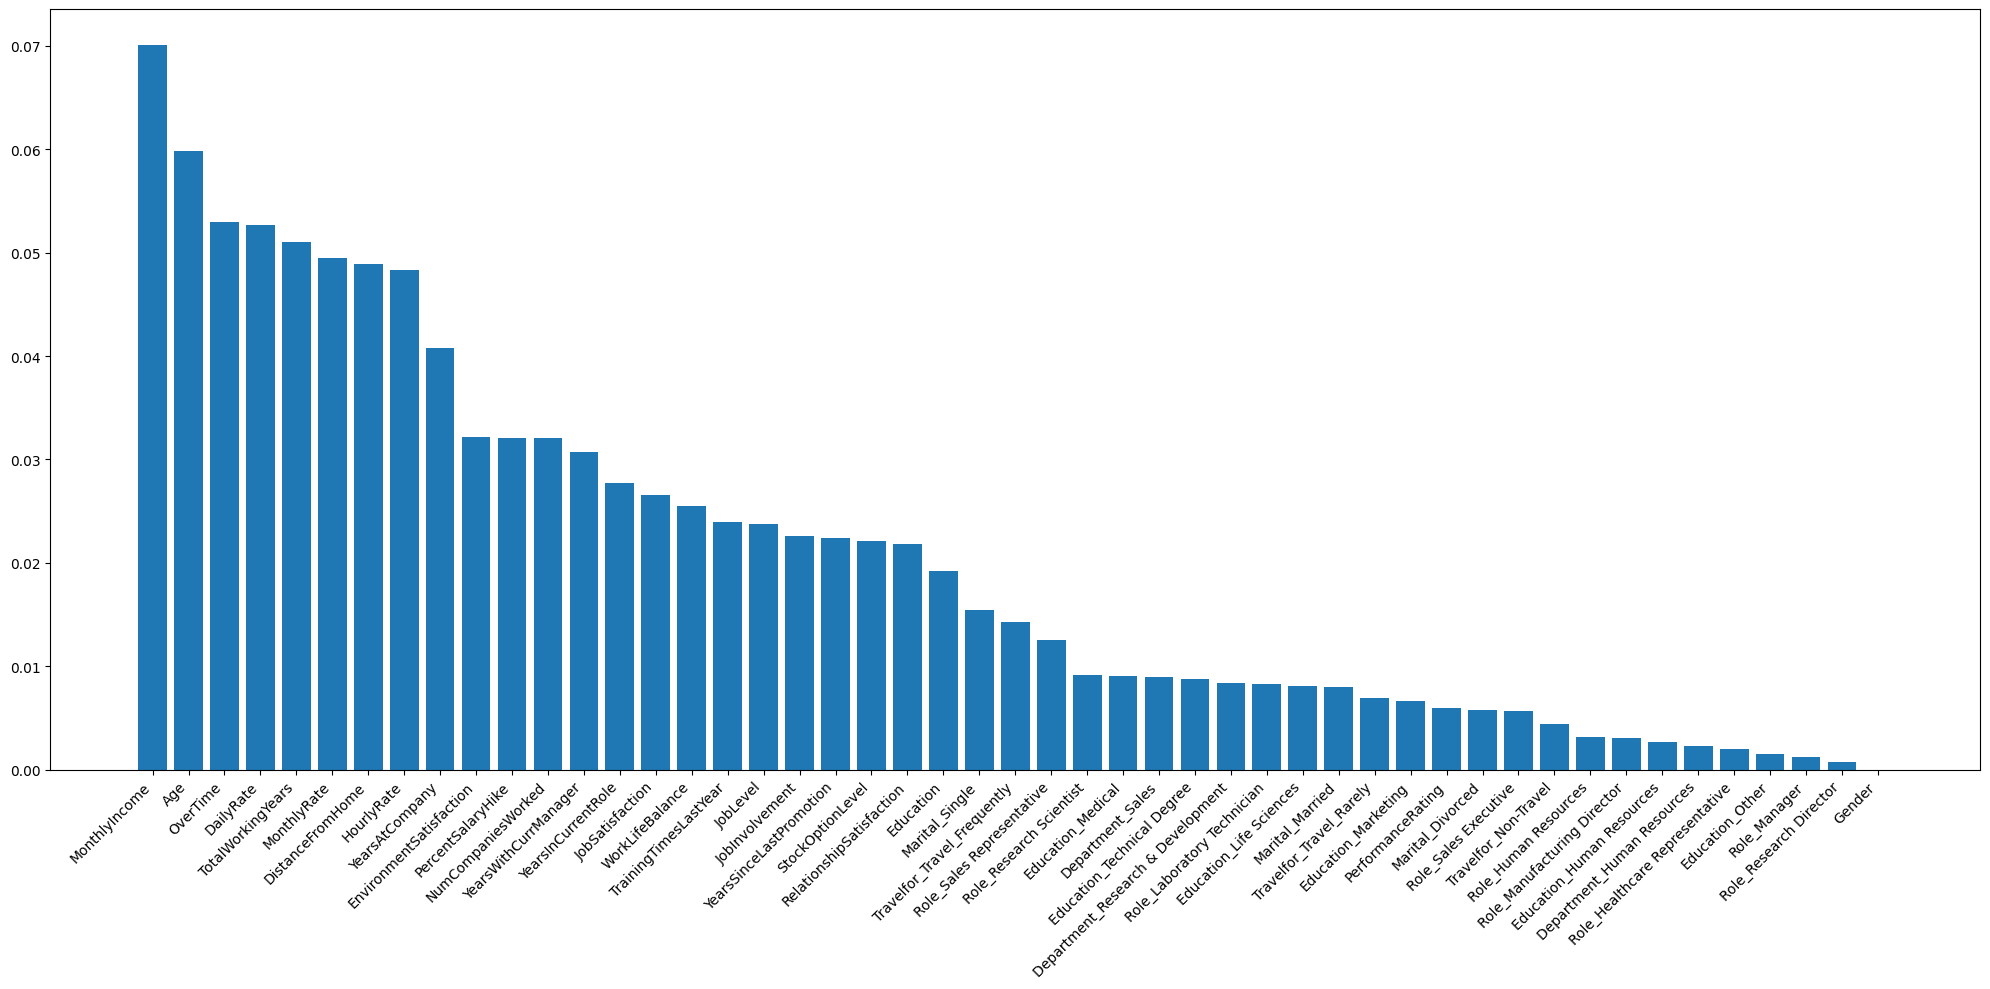

In [68]:
# Line 40 creates a dictionary named sorted_importances that 
# contains all features and their importance values, 
# sorted from most important to least important.

sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))
plt.figure(figsize= (20,10))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()